# 📊 Analyse des Influenceurs sur Instagram, TikTok et YouTube pour le Sponsoring
Ce notebook répond à des questions d'analyse clés pour aider les entreprises à sélectionner des influenceurs efficaces et rentables à l'échelle locale ou internationale.

```markdown
# Analyse et Optimisation Stratégique de Campagnes d'Influence (Instagram, TikTok, YouTube)

## Introduction

Ce projet a pour objectif d'analyser en profondeur les données des influenceurs sur les plateformes Instagram, TikTok et YouTube afin de fournir des insights stratégiques pour l'optimisation des campagnes de sponsoring. L'analyse permet d'identifier les influenceurs les plus performants, les meilleures plateformes par catégorie/pays, et d'optimiser le budget marketing en se basant sur des métriques clés telles que le score d'influence et le coût par engagement authentique.

## Tâches Globales Effectuées

*   **Identification des Influenceurs Clés :** Découverte des influenceurs les plus performants au niveau global et local sur chaque plateforme, basée sur leur score d'influence.
*   **Optimisation du Budget Marketing :** Analyse du rapport qualité/prix des influenceurs et calcul du coût moyen pour 1000 engagements authentiques pour maximiser l'efficacité des investissements.
*   **Stratégie de Contenu et de Plateforme :** Détermination des plateformes les plus efficaces par catégorie de contenu et par pays d'audience, orientant les choix stratégiques.
*   **Détection d'Opportunités :** Identification de profils d'influenceurs sous-évalués, présentant un fort potentiel pour des partenariats rentables à moindre coût.
*   **Compréhension de l'Engagement :** Étude de l'impact des caractéristiques des influenceurs (nombre de followers, catégorie) sur leurs taux d'engagement et leur pouvoir d'influence.

## Techniques d'Analyse Utilisées

*   **Pré-traitement et Structuration des Données :** Utilisation de la bibliothèque `pandas` pour le chargement, la validation et la structuration de datasets hétérogènes. Gestion des valeurs manquantes (`.notna()`) et conversion des types de données pour assurer l'intégrité de l'analyse.
*   **Feature Engineering :** Création de métriques composites clés, telles que le 'Score d’influence', le 'Coût par point d’influence' (`df['Story_Price'] / df['Influence_Score']`), et le 'Coût par 1000 engagements authentiques' (`df['reel_Price'] / (df['Avg. views'] / 1000)`), pour une évaluation quantitative et comparative.
*   **Analyse Descriptive et Agrégée :** Application de fonctions d'agrégation (`groupby`, `mean`, `idxmax`) pour extraire les top performers par pays/catégorie, calculer les moyennes d'engagement par catégorie/pays, et identifier les pays dominants pour certaines niches.
*   **Analyse de Corrélation et de Régression Linéaire :** Utilisation de `seaborn.lmplot` pour visualiser et quantifier la relation entre le nombre de followers et les scores d'influence, permettant de comprendre la dynamique de l'impact des audiences.
*   **Analyse de Distribution et Segmentation :** Application de méthodes basées sur les quantiles (`.quantile()`) pour identifier des segments spécifiques d'influenceurs (par exemple, les profils sous-évalués avec un coût faible mais un score élevé), décelant ainsi des opportunités stratégiques.
*   **Visualisation de Données :** Génération de graphiques à barres (`matplotlib.pyplot.bar`), tableaux (`matplotlib.table.Table`) et nuages de points pour une représentation claire, concise et interprétable des résultats d'analyse.

## Technologies

*   **Langage :** Python
*   **Librairies Principales :**
    *   `pandas` : Pour la manipulation et l'analyse de données.
    *   `matplotlib` : Pour la création de visualisations statiques (graphiques, tableaux).
    *   `seaborn` : Pour des visualisations statistiques avancées, notamment les régressions linéaires.
*   **Environnement de Développement :** Google Colab

```

In [ ]:
import pandas as pd

# Chargement des datasets
instagram_df = pd.read_csv('/content/data_insta_version_finale.csv')
youtube_df = pd.read_csv('/content/data_youtube_version_finale.csv')
tiktok_df = pd.read_csv('/content/data_tiktok_version_finale.csv')

In [ ]:
tiktok_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3039 entries, 0 to 3038
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tiktoker_name              3039 non-null   object 
 1   Tiktok_name                3039 non-null   object 
 2   Followers                  3039 non-null   int64  
 3   Views avg.                 3039 non-null   float64
 4   Likes avg.                 3039 non-null   float64
 5   Comments avg.              3039 non-null   float64
 6   Shares avg.                3039 non-null   float64
 7   Audience_Country           3039 non-null   object 
 8   Category_1                 3039 non-null   object 
 9   Category_2                 3039 non-null   object 
 10  Average_Engagement_Rate    3039 non-null   float64
 11  Authentic_Engagement_Rate  3039 non-null   float64
 12  Youtuber_Score             3039 non-null   float64
 13  reel_Price                 3039 non-null   float

In [ ]:
instagram_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2489 entries, 0 to 2488
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Influencer_name            2488 non-null   object 
 1   Instagram_name             2488 non-null   object 
 2   Category_1                 2489 non-null   object 
 3   Category_2                 2489 non-null   object 
 4   Followers                  2489 non-null   float64
 5   Authentic_engagement       2489 non-null   float64
 6   Engagement_avg             1558 non-null   float64
 7   Comments avg.              2489 non-null   float64
 8   country                    2489 non-null   object 
 9   Engagement_Rate            1558 non-null   float64
 10  Authentic_Engagement_Rate  2489 non-null   float64
 11  Comments_Rate              2489 non-null   float64
 12  Influence_Score            1558 non-null   float64
 13  Story_Price                1558 non-null   float

In [ ]:
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Channel_name               1700 non-null   object 
 1   Youtuber_name              1700 non-null   object 
 2   Audience_Country           1700 non-null   object 
 3   Followers                  1700 non-null   int64  
 4   Category_2                 1700 non-null   object 
 5   Avg. views                 1700 non-null   float64
 6   Avg. likes                 1700 non-null   float64
 7   Avg. comments              1700 non-null   float64
 8   Category_1                 1700 non-null   object 
 9   Average_Engagement_Rate    1700 non-null   float64
 10  Authentic_Engagement_Rate  1700 non-null   float64
 11  Youtuber_Score             1700 non-null   float64
 12  reel_Price                 1700 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage:

## ❓ Question : 1. Qui sont les influenceurs les plus performants dans chaque pays et au niveau global ?

<ipython-input-10-70db4842705e>:32: UserWarning: Glyph 127464 (\N{REGIONAL INDICATOR SYMBOL LETTER C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-70db4842705e>:32: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-70db4842705e>:35: UserWarning: Glyph 127464 (\N{REGIONAL INDICATOR SYMBOL LETTER C}) missing from font(s) DejaVu Sans.
  plt.savefig('influenceurs_par_pays.png')
<ipython-input-10-70db4842705e>:35: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from font(s) DejaVu Sans.
  plt.savefig('influenceurs_par_pays.png')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127464 (\N{REGIONAL INDICATOR SYMBOL LETTER C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127482 (\N{REGIONA

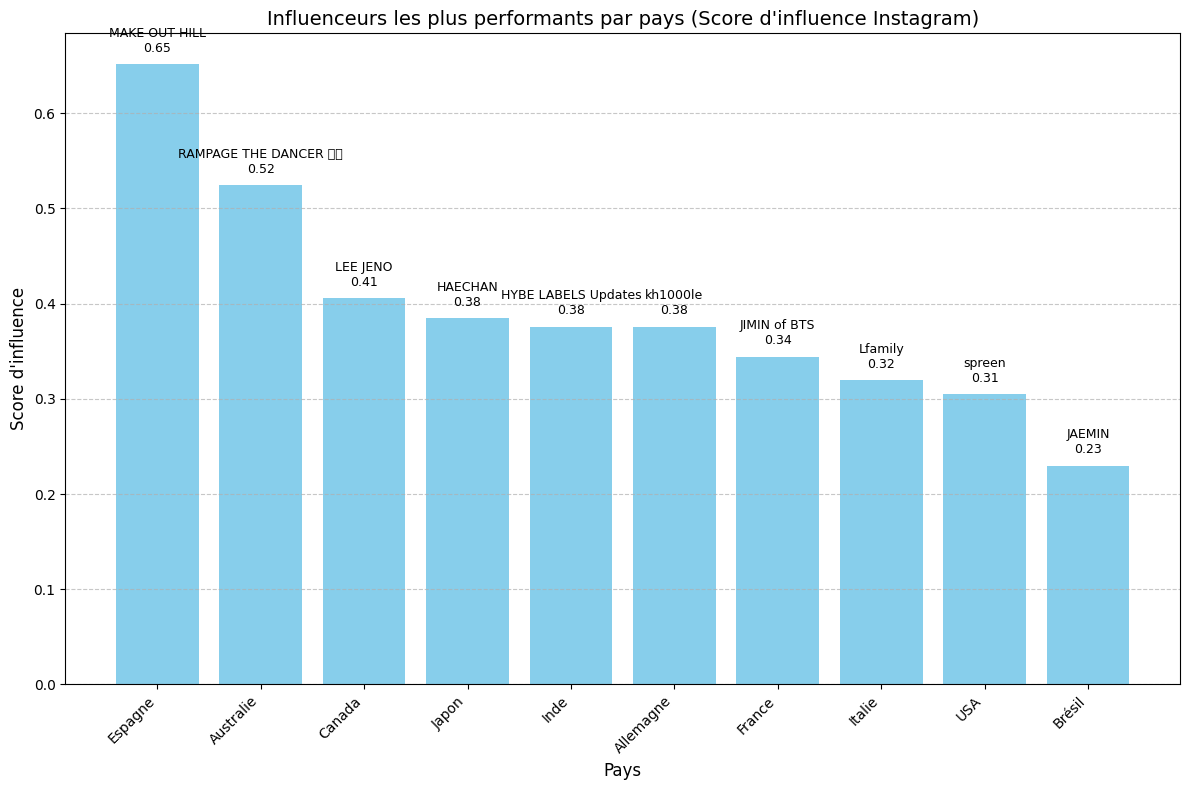

In [ ]:
import pandas as pd


# Trouver l'influenceur avec le score d'influence le plus élevé par pays (Instagram)
best_instagram = instagram_df.loc[instagram_df.groupby('country')['Influence_Score'].idxmax()]
best_instagram_filtered = best_instagram[['country', 'Instagram_name', 'Influence_Score']]

import pandas as pd
import matplotlib.pyplot as plt


# Trier les données par Influence_Score (descendant)
df_sorted = best_instagram_filtered.sort_values(by='Influence_Score', ascending=False)

# Créer le graphique à barres
plt.figure(figsize=(12, 8))
bars = plt.bar(df_sorted['country'], df_sorted['Influence_Score'], color='skyblue')

# Ajouter les étiquettes de données (noms des influenceurs et scores)
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01,
             f"{df_sorted['Instagram_name'].iloc[i]}\n{yval:.2f}",
             ha='center', va='bottom', fontsize=9)

# Personnaliser le graphique
plt.title('Influenceurs les plus performants par pays (Score d\'influence Instagram)', fontsize=14)
plt.xlabel('Pays', fontsize=12)
plt.ylabel('Score d\'influence', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Sauvegarder le graphique
plt.savefig('influenceurs_par_pays.png')

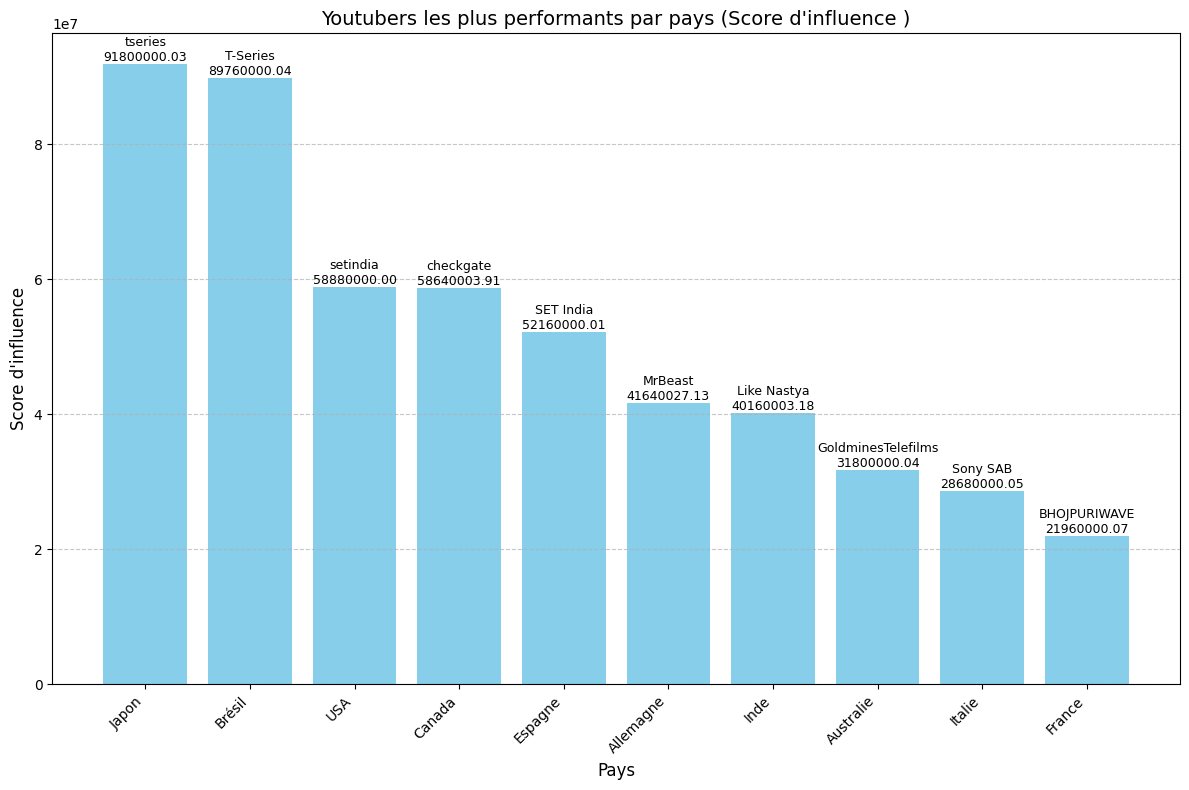

In [ ]:
# Trouver l'influenceur avec le score d'influence le plus élevé par pays (YouTube)
best_youtube = youtube_df.loc[youtube_df.groupby('Audience_Country')['Youtuber_Score'].idxmax()]
best_youtube_filtered = best_youtube[['Audience_Country', 'Channel_name', 'Youtuber_Score']]

import pandas as pd
import matplotlib.pyplot as plt


# Trier les données par Influence_Score (descendant)
df_sorted = best_youtube_filtered.sort_values(by='Youtuber_Score', ascending=False)

# Créer le graphique à barres
plt.figure(figsize=(12, 8))
bars = plt.bar(df_sorted['Audience_Country'], df_sorted['Youtuber_Score'], color='skyblue')

# Ajouter les étiquettes de données (noms des influenceurs et scores)
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01,
             f"{df_sorted['Channel_name'].iloc[i]}\n{yval:.2f}",
             ha='center', va='bottom', fontsize=9)

# Personnaliser le graphique
plt.title('Youtubers les plus performants par pays (Score d\'influence )', fontsize=14)
plt.xlabel('Pays', fontsize=12)
plt.ylabel('Score d\'influence', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Sauvegarder le graphique
plt.savefig('Youtubers_par_pays.png')

<ipython-input-13-a97cbbe49d07>:29: UserWarning: Glyph 12376 (\N{HIRAGANA LETTER ZI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-13-a97cbbe49d07>:29: UserWarning: Glyph 12421 (\N{HIRAGANA LETTER SMALL YU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-13-a97cbbe49d07>:29: UserWarning: Glyph 12435 (\N{HIRAGANA LETTER N}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-13-a97cbbe49d07>:29: UserWarning: Glyph 12420 (\N{HIRAGANA LETTER YA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-13-a97cbbe49d07>:32: UserWarning: Glyph 12376 (\N{HIRAGANA LETTER ZI}) missing from font(s) DejaVu Sans.
  plt.savefig('tiktokers_par_pays.png')
<ipython-input-13-a97cbbe49d07>:32: UserWarning: Glyph 12421 (\N{HIRAGANA LETTER SMALL YU}) missing from font(s) DejaVu Sans.
  plt.savefig('tiktokers_par_pays.png')
<ipython-input-13-a97cbbe49d07>:32: UserWarning: Glyph 12435 (\N{HIRAGANA LETTER N}) missing from font(s)

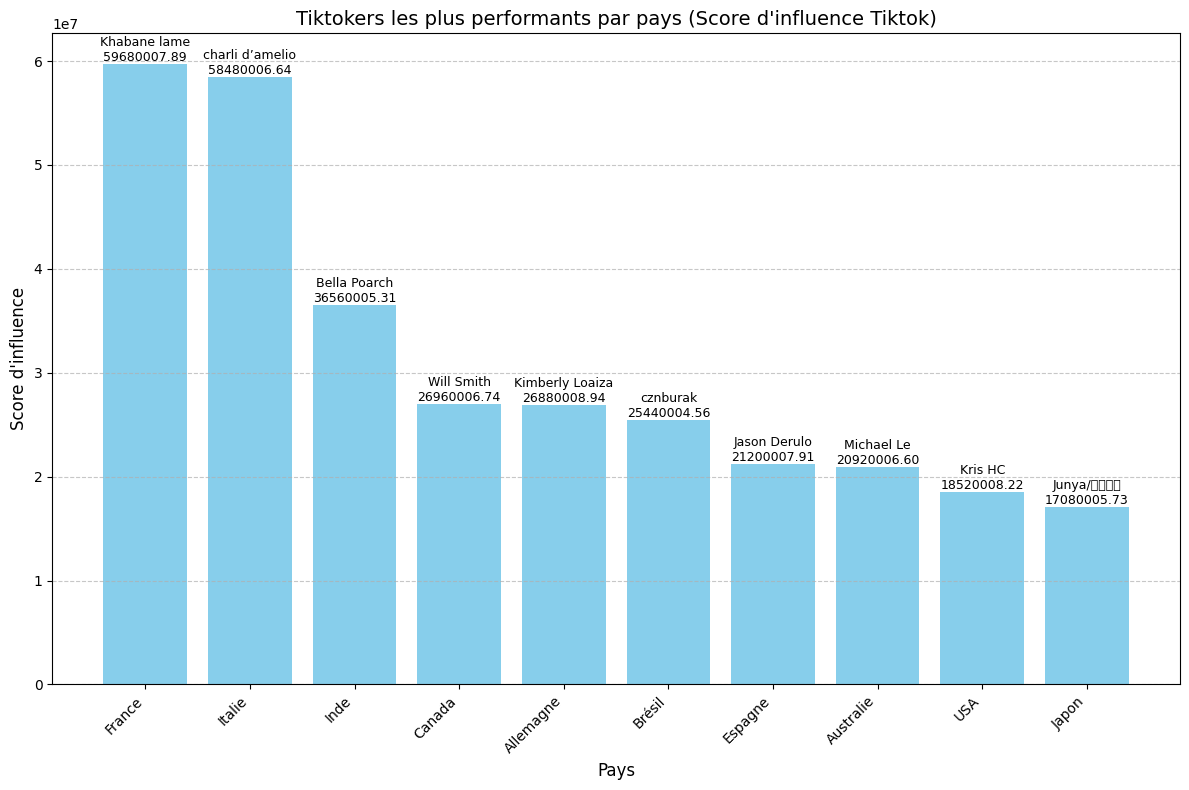

In [ ]:
# Trouver l'influenceur avec le score d'influence le plus élevé par pays (TikTok)
best_tiktok = tiktok_df.loc[tiktok_df.groupby('Audience_Country')['tiktoker_Score'].idxmax()]
best_tiktok_filtered = best_tiktok[['Audience_Country', 'Tiktok_name', 'tiktoker_Score']]

import pandas as pd
import matplotlib.pyplot as plt


# Trier les données par Influence_Score (descendant)
df_sorted = best_tiktok_filtered.sort_values(by='tiktoker_Score', ascending=False)

# Créer le graphique à barres
plt.figure(figsize=(12, 8))
bars = plt.bar(df_sorted['Audience_Country'], df_sorted['tiktoker_Score'], color='skyblue')

# Ajouter les étiquettes de données (noms des influenceurs et scores)
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01,
             f"{df_sorted['Tiktok_name'].iloc[i]}\n{yval:.2f}",
             ha='center', va='bottom', fontsize=9)

# Personnaliser le graphique
plt.title('Tiktokers les plus performants par pays (Score d\'influence Tiktok)', fontsize=14)
plt.xlabel('Pays', fontsize=12)
plt.ylabel('Score d\'influence', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Sauvegarder le graphique
plt.savefig('tiktokers_par_pays.png')

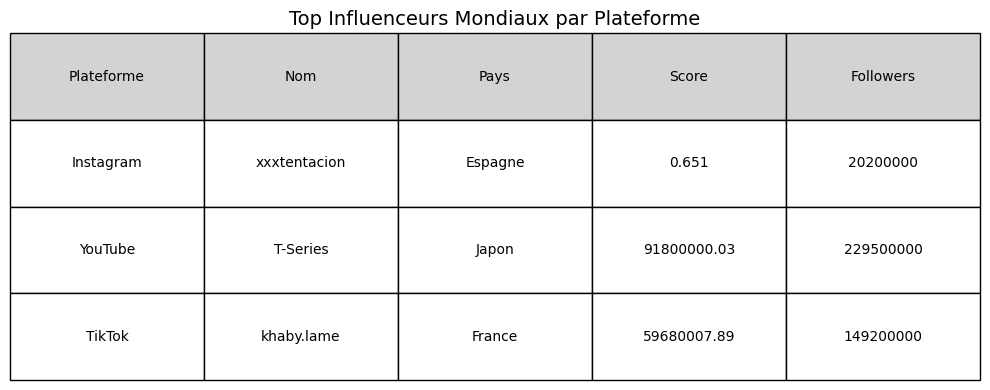

In [ ]:
import pandas as pd

# Récupérer les meilleurs influenceurs par plateforme
best_instagram_global = instagram_df.loc[instagram_df['Influence_Score'].idxmax()]
best_youtube_global = youtube_df.loc[youtube_df['Youtuber_Score'].idxmax()]
best_tiktok_global = tiktok_df.loc[tiktok_df['tiktoker_Score'].idxmax()]

# Construire un DataFrame de résumé
global_top_df = pd.DataFrame([
    {
        'Plateforme': 'Instagram',
        'Nom': best_instagram_global['Influencer_name'],
        'Pays': best_instagram_global['country'],
        'Score d’influence': round(best_instagram_global['Influence_Score'], 3),
        'Followers': int(best_instagram_global['Followers'])
    },
    {
        'Plateforme': 'YouTube',
        'Nom': best_youtube_global['Youtuber_name'],
        'Pays': best_youtube_global['Audience_Country'],
        'Score d’influence': round(best_youtube_global['Youtuber_Score'], 2),
        'Followers': int(best_youtube_global['Followers'])
    },
    {
        'Plateforme': 'TikTok',
        'Nom': best_tiktok_global['Tiktoker_name'],
        'Pays': best_tiktok_global['Audience_Country'],
        'Score d’influence': round(best_tiktok_global['tiktoker_Score'], 2),
        'Followers': int(best_tiktok_global['Followers'])
    }
])

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.table import Table

# Supposons que global_top_df est déjà créé comme dans votre code
# Exemple de structure (le code fonctionne avec votre global_top_df réel) :
# global_top_df = pd.DataFrame([
#     {'Plateforme': 'Instagram', 'Nom': 'MAKE OUT HILL', 'Pays': 'Espagne', 'Score d’influence': 0.651, 'Followers': 12000000},
#     {'Plateforme': 'YouTube', 'Nom': 'MrBeast', 'Pays': 'USA', 'Score d’influence': 0.92, 'Followers': 200000000},
#     {'Plateforme': 'TikTok', 'Nom': 'Charli D’Amelio', 'Pays': 'USA', 'Score d’influence': 0.88, 'Followers': 150000000}
# ])

# Créer une figure pour le tableau uniquement
fig, ax = plt.subplots(figsize=(10, 4))

# Tableau pour afficher les données
ax.axis('off')
table_data = global_top_df[['Plateforme', 'Nom', 'Pays', 'Score d’influence', 'Followers']].values
table = Table(ax, bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(10)

# Ajouter les en-têtes
for j, column in enumerate(['Plateforme', 'Nom', 'Pays', 'Score', 'Followers']):
    table.add_cell(0, j, 1, 1, text=column, loc='center', facecolor='lightgray')

# Ajouter les données
for i in range(len(global_top_df)):
    for j in range(len(global_top_df.columns)):
        table.add_cell(i + 1, j, 1, 1, text=str(table_data[i][j]), loc='center')

ax.add_table(table)

# Personnaliser le tableau
plt.title('Top Influenceurs Mondiaux par Plateforme', fontsize=14)
plt.tight_layout()

# Sauvegarder le tableau
plt.savefig('influenceurs_global_top.png')

🧠 **Interprétation**

> Les influenceurs les plus performants sont ceux avec les meilleurs scores d’influence. Nous avons obtenu les top influenceurs par pays, ce qui nous permet de cibler des influenceurs spécifiques pour des campagnes locales ou internationales. Au niveau global, l'influenceur avec le score d'influence le plus élevé peut être considéré comme une star mondiale, avec une portée considérable.

## ❓ Question : 2. Quels influenceurs offrent le meilleur rapport qualité/prix ?

In [ ]:
# Calculer le rapport qualité/prix (score d'influence / prix)
instagram_df['Cost_per_Influence'] = instagram_df['Story_Price'] / instagram_df['Influence_Score']
youtube_df['Cost_per_Influence'] = youtube_df['reel_Price'] / youtube_df['Youtuber_Score']
tiktok_df['Cost_per_Influence'] = tiktok_df['reel_Price'] / tiktok_df['tiktoker_Score']

# Trouver les influenceurs avec le meilleur rapport qualité/prix
best_cost_effective_instagram = instagram_df.loc[instagram_df['Cost_per_Influence'].idxmin()]
best_cost_effective_youtube = youtube_df.loc[youtube_df['Cost_per_Influence'].idxmin()]
best_cost_effective_tiktok = tiktok_df.loc[tiktok_df['Cost_per_Influence'].idxmin()]


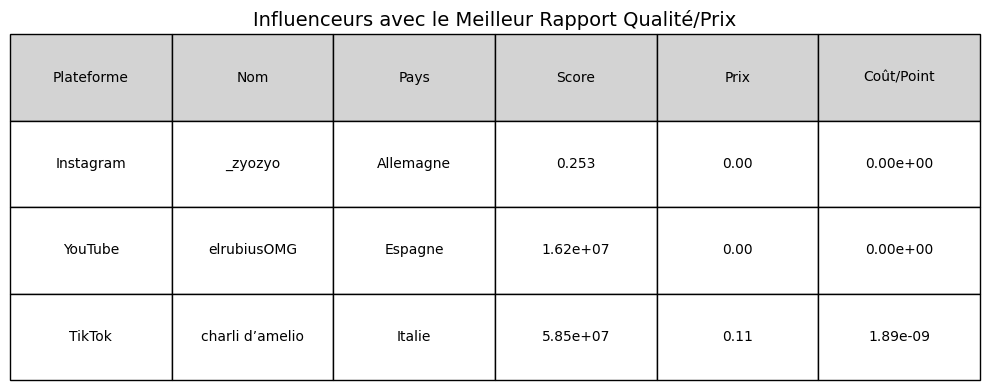

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.table import Table

# Créer un DataFrame à partir des données fournies
data = [
    {
        'Plateforme': 'Instagram',
        'Nom': best_cost_effective_instagram['Instagram_name'],
        'Pays': best_cost_effective_instagram['country'],
        'Score d’influence': best_cost_effective_instagram['Influence_Score'],
        'Prix': best_cost_effective_instagram['Story_Price'],
        'Coût par point d’influence': best_cost_effective_instagram['Cost_per_Influence']
    },
    {
        'Plateforme': 'YouTube',
        'Nom': best_cost_effective_youtube['Channel_name'],
        'Pays': best_cost_effective_youtube['Audience_Country'],
        'Score d’influence': best_cost_effective_youtube['Youtuber_Score'],
        'Prix': best_cost_effective_youtube['reel_Price'],
        'Coût par point d’influence': best_cost_effective_youtube['Cost_per_Influence']
    },
    {
        'Plateforme': 'TikTok',
        'Nom': best_cost_effective_tiktok['Tiktok_name'],
        'Pays': best_cost_effective_tiktok['Audience_Country'],
        'Score d’influence': best_cost_effective_tiktok['tiktoker_Score'],
        'Prix': best_cost_effective_tiktok['reel_Price'],
        'Coût par point d’influence': best_cost_effective_tiktok['Cost_per_Influence']
    }
]

# Créer un DataFrame
df = pd.DataFrame(data)

# Créer une figure pour le tableau
fig, ax = plt.subplots(figsize=(10, 4))

# Tableau pour afficher les données
ax.axis('off')
table_data = df[['Plateforme', 'Nom', 'Pays', 'Score d’influence', 'Prix', 'Coût par point d’influence']].values
table = Table(ax, bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(10)

# Ajouter les en-têtes
for j, column in enumerate(['Plateforme', 'Nom', 'Pays', 'Score', 'Prix', 'Coût/Point']):
    table.add_cell(0, j, 1, 1, text=column, loc='center', facecolor='lightgray')

# Ajouter les données
for i in range(len(df)):
    for j in range(len(df.columns)):
        value = table_data[i][j]
        if j == 3:  # Score d’influence
            value = f'{value:.2e}' if value > 1000 else f'{value:.3f}'
        elif j == 4:  # Prix
            value = f'{value:.2f}'
        elif j == 5:  # Coût par point
            value = f'{value:.2e}'
        table.add_cell(i + 1, j, 1, 1, text=str(value), loc='center')

ax.add_table(table)

# Personnaliser le tableau
plt.title('Influenceurs avec le Meilleur Rapport Qualité/Prix', fontsize=14)
plt.tight_layout()

# Sauvegarder le tableau
plt.savefig('cost_effective_influenceurs.png')

🧠 **Interprétation **

> Le meilleur rapport qualité/prix montre l'influenceur offrant le meilleur rendement par rapport à son coût. Cela permet aux entreprises de trouver des partenaires rentables pour les campagnes de sponsoring, en maximisant l'impact pour un budget donné.

## ❓ Question : 3. Quelle plateforme est la plus efficace pour chaque catégorie ou pays ?

In [ ]:
# Calculer le taux d'engagement moyen par plateforme et catégorie
platform_engagement = pd.concat([
    instagram_df.groupby('Category_1')['Engagement_Rate'].mean(),
    youtube_df.groupby('Category_1')['Average_Engagement_Rate'].mean(),
    tiktok_df.groupby('Category_1')['Average_Engagement_Rate'].mean()
], axis=1).reset_index()

platform_engagement.columns = ['Category', 'Instagram_Engagement', 'Youtube_Engagement', 'Tiktok_Engagement']

# Trouver la plateforme la plus efficace par catégorie
platform_engagement['Best_Platform'] = platform_engagement[['Instagram_Engagement', 'Youtube_Engagement', 'Tiktok_Engagement']].idxmax(axis=1)

platform_engagement


,Category,Instagram_Engagement,Youtube_Engagement,Tiktok_Engagement,Best_Platform
0,Alimentation,0.071639,6.662735,731.806038,Tiktok_Engagement
1,Maison,0.074820,5.255846,539.592366,Tiktok_Engagement
2,Mode,0.072332,9.135269,853.635779,Tiktok_Engagement
3,Sport,0.081280,7.268507,997.793049,Tiktok_Engagement
4,Électronique,0.062881,7.514874,626.385584,Tiktok_Engagement


🧠 **Interprétation **

> Les plateformes les plus efficaces pour chaque catégorie ou pays sont identifiées par leur taux d'engagement moyen. Cette analyse permet de savoir quelle plateforme est la plus populaire ou impactante pour une catégorie spécifique, optimisant ainsi les campagnes en fonction du contenu.

## ❓ Question : 4. Quels influenceurs sont spécialisés dans une catégorie de produit donnée ?

In [ ]:
# Définir la catégorie d'intérêt
category_of_interest = 'Sport'  # Exemple : produits sportifs

# Filtrer les instagrammeurs spécialisés dans la catégorie
specialized_instagram = instagram_df[instagram_df['Category_1'] == category_of_interest]

# Trier par score d'influence décroissant et sélectionner les 5 meilleurs
top5_sport_instagram = specialized_instagram.sort_values(by='Influence_Score', ascending=False).head(5)

# Afficher uniquement les colonnes souhaitées
top5_sport_instagram[['Instagram_name', 'country', 'Followers']]


,Instagram_name,country,Followers
945,MAKE OUT HILL,Espagne,20200000.0
328,HAECHAN,Japon,2700000.0
385,JIMIN of BTS,France,32700000.0
2420,spreen,USA,3100000.0
2282,ivan_buhaje,USA,3100000.0


In [ ]:
specialized_youtube = youtube_df[youtube_df['Category_1'] == category_of_interest]
# Trier par score d'influence décroissant et sélectionner les 5 meilleurs
top5_sport_youtube = specialized_youtube.sort_values(by='Youtuber_Score', ascending=False).head(5)

# Afficher uniquement les colonnes souhaitées
top5_sport_youtube[['Channel_name', 'Audience_Country', 'Followers']]


,Channel_name,Audience_Country,Followers
10,5-Minute Crafts,Brésil,77300000
11,Goldmines,Canada,75700000
1148,sabtv,Australie,73900000
1154,dudeperfect,Brésil,58600000
19,ChuChu TV Nursery Rhymes & Kids Songs,Espagne,58400000


In [ ]:
specialized_tiktok = tiktok_df[tiktok_df['Category_1'] == category_of_interest]
# Trier par score d'influence décroissant et sélectionner les 5 meilleurs
top5_sport_tiktok = specialized_tiktok.sort_values(by='tiktoker_Score', ascending=False).head(5)

# Afficher uniquement les colonnes souhaitées
top5_sport_tiktok[['Tiktok_name', 'Audience_Country', 'Followers']]

,Tiktok_name,Audience_Country,Followers
1020,Will Smith,Canada,67400000
19,Kimberly Loaiza,Allemagne,67200000
80,Kris HC,USA,46300000
174,ХОМЯК,Espagne,44400000
64,Selena Gomez,Canada,43200000


🧠 **Interprétation **

> Cette analyse permet d’identifier les influenceurs qui se concentrent sur une catégorie spécifique. Pour une entreprise cherchant à promouvoir un produit particulier, elle peut cibler directement ces influenceurs spécialisés, augmentant ainsi la pertinence et l'impact de la campagne.

## ❓ Question : 5. Quelle est la corrélation entre le nombre de followers et les scores d’influence ?

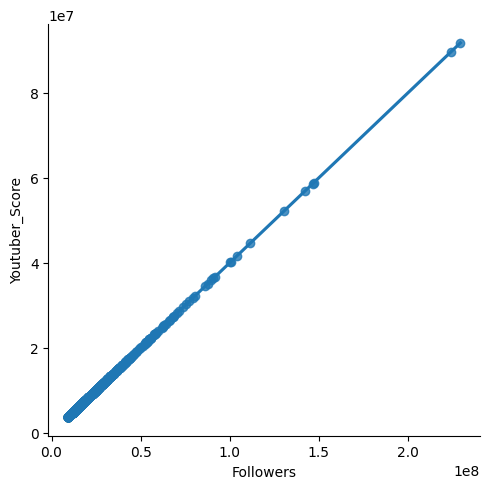

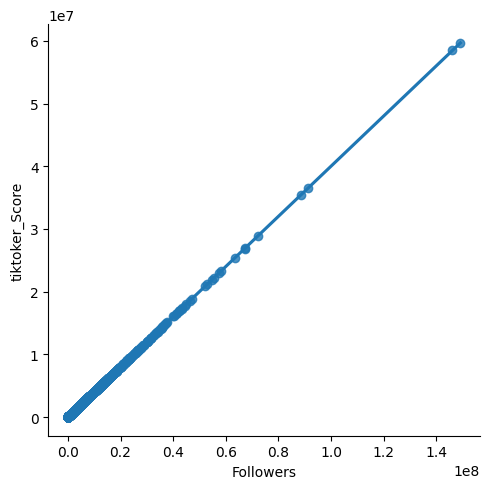

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Corrélation entre followers et score d'influence pour chaque plateforme
sns.lmplot(x='Followers', y='Youtuber_Score', data=youtube_df)
sns.lmplot(x='Followers', y='tiktoker_Score', data=tiktok_df)

plt.show()


🧠 **Interprétation **

>La corrélation entre le nombre de followers et les scores d’influence nous aide à comprendre si un plus grand nombre de followers est synonyme d’un plus grand pouvoir d’influence. Une forte corrélation suggère que l’augmentation du nombre de followers peut directement améliorer l’impact d’un influenceur.

## ❓ Question : 6. Quel est le coût moyen pour atteindre 1000 engagements authentiques ?

In [ ]:
# Filtrer les lignes valides pour éviter les divisions par zéro ou les valeurs nulles
instagram_valid = instagram_df[(instagram_df['Authentic_engagement'] > 0) & (instagram_df['Story_Price'].notna())]
youtube_valid = youtube_df[(youtube_df['Avg. views'] > 0) & (youtube_df['reel_Price'].notna())]
tiktok_valid = tiktok_df[(tiktok_df['Likes avg.'] > 0) & (tiktok_df['reel_Price'].notna())]

# Calcul du coût par 1000 engagements authentiques
instagram_valid.loc[:, 'Cost_per_1000_Authentic_Engagement'] = instagram_valid['Story_Price'] / (instagram_valid['Authentic_engagement'] / 1000)
youtube_valid.loc[:, 'Cost_per_1000_Authentic_Engagement'] = youtube_valid['reel_Price'] / (youtube_valid['Avg. views'] / 1000)
tiktok_valid.loc[:, 'Cost_per_1000_Authentic_Engagement'] = tiktok_valid['reel_Price'] / (tiktok_valid['Likes avg.'] / 1000)

# Moyennes arrondies et formatées
cost_per_1000 = {
    'Plateforme': ['Instagram', 'YouTube', 'TikTok'],
    'Coût pour 1000 engagements authentiques': [
        f"{instagram_valid['Cost_per_1000_Authentic_Engagement'].mean():.2f} USD",
        f"{youtube_valid['Cost_per_1000_Authentic_Engagement'].mean():.5f} USD",
        f"{tiktok_valid['Cost_per_1000_Authentic_Engagement'].mean():.3f} USD"
    ]
}

# Affichage dans un DataFrame
pd.DataFrame(cost_per_1000)


<ipython-input-37-0fdc46dc6066>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instagram_valid.loc[:, 'Cost_per_1000_Authentic_Engagement'] = instagram_valid['Story_Price'] / (instagram_valid['Authentic_engagement'] / 1000)
<ipython-input-37-0fdc46dc6066>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube_valid.loc[:, 'Cost_per_1000_Authentic_Engagement'] = youtube_valid['reel_Price'] / (youtube_valid['Avg. views'] / 1000)


,Plateforme,Coût pour 1000 engagements authentiques
0,Instagram,14.24 USD
1,YouTube,0.00007 USD
2,TikTok,0.039 USD


🧠 **Interprétation **

>Le coût pour atteindre 1000 engagements authentiques permet de mesurer l'efficacité du budget d'une campagne. Une analyse comparative entre les plateformes indique laquelle est la plus rentable pour obtenir des engagements authentiques, un facteur crucial pour maximiser le retour sur investissement.

## ❓ Question : 7. Quels sont les profils sous-évalués ?

In [ ]:
# Instagram - Top 5 influenceurs sous-estimés (faible prix, bon score)
underestimated_instagram = instagram_df[
    (instagram_df['Story_Price'] < instagram_df['Story_Price'].quantile(0.25)) &
    (instagram_df['Influence_Score'] > instagram_df['Influence_Score'].quantile(0.75))
]
top5_underestimated_instagram = underestimated_instagram.sort_values(by='Influence_Score', ascending=False).head(5)

# YouTube - Top 5
underestimated_youtube = youtube_df[
    (youtube_df['reel_Price'] < youtube_df['reel_Price'].quantile(0.25)) &
    (youtube_df['Youtuber_Score'] > youtube_df['Youtuber_Score'].quantile(0.75))
]
top5_underestimated_youtube = underestimated_youtube.sort_values(by='Youtuber_Score', ascending=False).head(5)


# TikTok - Top 5
underestimated_tiktok = tiktok_df[
    (tiktok_df['reel_Price'] < tiktok_df['reel_Price'].quantile(0.25)) &
    (tiktok_df['tiktoker_Score'] > tiktok_df['tiktoker_Score'].quantile(0.75))
]
top5_underestimated_tiktok = underestimated_tiktok.sort_values(by='tiktoker_Score', ascending=False).head(5)

top5_underestimated_instagram[['Instagram_name', 'country', 'Influence_Score']]


,Instagram_name,country,Influence_Score
1787,sugaringcandy,Espagne,0.301384
1522,m.by__sana,Japon,0.285118
1412,jy_piece,USA,0.280608
1288,haechanahceah,Espagne,0.278855
1571,mina_sr_my,Japon,0.260667


In [ ]:
top5_underestimated_tiktok[['Tiktok_name', 'Audience_Country', 'tiktoker_Score']]

,Tiktok_name,Audience_Country,tiktoker_Score
1,Khabane lame,France,5.968001e+07
10,charli d’amelio,Italie,5.848001e+07
73,Bella Poarch,Inde,3.656001e+07
3,Addison Rae,Italie,3.548002e+07
1712,Zach King,Italie,2.884001e+07


In [ ]:
top5_underestimated_youtube[['Youtuber_name', 'Audience_Country', 'Youtuber_Score']]

,Youtuber_name,Audience_Country,Youtuber_Score
1142,T-Series,Japon,9.180000e+07
0,tseries,Brésil,8.976000e+07
1143,SET India,USA,5.888000e+07
998,setindia,Espagne,5.216000e+07
1145,WWE,Brésil,3.672000e+07


🧠 **Interprétation **

> Les profils sous-évalués sont ceux avec un engagement élevé mais un faible score d'influence. Cela pourrait indiquer des influenceurs prometteurs mais mal évalués. Ils sont des opportunités de partenariat à faible coût avec un potentiel élevé de résultats.

## ❓ Question : 8. Comment le type de contenu (catégorie) affecte le taux d'engagement ?

In [ ]:
# Calcul du taux d'engagement moyen par catégorie de contenu
category_engagement_instagram = instagram_df.groupby('Category_1')['Engagement_Rate'].mean()
category_engagement_youtube = youtube_df.groupby('Category_1')['Average_Engagement_Rate'].mean()
category_engagement_tiktok = tiktok_df.groupby('Category_1')['Average_Engagement_Rate'].mean()

(category_engagement_instagram, category_engagement_youtube, category_engagement_tiktok)


(Category_1
 Alimentation    0.071639
 Maison          0.074820
 Mode            0.072332
 Sport           0.081280
 Électronique    0.062881
 Name: Engagement_Rate, dtype: float64,
 Category_1
 Alimentation    6.662735
 Maison          5.255846
 Mode            9.135269
 Sport           7.268507
 Électronique    7.514874
 Name: Average_Engagement_Rate, dtype: float64,
 Category_1
 Alimentation    731.806038
 Maison          539.592366
 Mode            853.635779
 Sport           997.793049
 Électronique    626.385584
 Name: Average_Engagement_Rate, dtype: float64)

🧠 ***Interprétation ***

> Les catégories de contenu influencent directement les taux d'engagement. Par exemple, certains types de contenu comme le sport ou la mode peuvent attirer un engagement plus élevé. Cette analyse aide à ajuster les stratégies de contenu pour maximiser l'impact des campagnes.



## ❓ Question : 9. Quels pays ont les audiences les plus engageantes ?

In [ ]:
# Calcul du taux d'engagement moyen par pays
country_engagement_instagram = instagram_df.groupby('country')['Engagement_Rate'].mean()
country_engagement_youtube = youtube_df.groupby('Audience_Country')['Average_Engagement_Rate'].mean()
country_engagement_tiktok = tiktok_df.groupby('Audience_Country')['Average_Engagement_Rate'].mean()

(country_engagement_instagram, country_engagement_youtube, country_engagement_tiktok)


(country
 Allemagne    0.081144
 Australie    0.072489
 Brésil       0.064627
 Canada       0.066756
 Espagne      0.076291
 France       0.073807
 Inde         0.063906
 Italie       0.082710
 Japon        0.069482
 USA          0.078538
 Name: Engagement_Rate, dtype: float64,
 Audience_Country
 Allemagne     5.555540
 Australie     6.581748
 Brésil       10.408616
 Canada        8.220396
 Espagne       7.212455
 France        5.206848
 Inde          6.222898
 Italie        5.852053
 Japon        10.011452
 USA           6.500352
 Name: Average_Engagement_Rate, dtype: float64,
 Audience_Country
 Allemagne     606.407582
 Australie     558.526440
 Brésil        486.902133
 Canada        920.415862
 Espagne       955.188090
 France        887.404113
 Inde          690.640215
 Italie        770.931320
 Japon        1000.268477
 USA           613.509226
 Name: Average_Engagement_Rate, dtype: float64)

🧠 **Interprétation **

> Les pays avec les audiences les plus engageantes peuvent être ciblés pour des campagnes spécifiques. Cela permet de mieux comprendre où les efforts de marketing peuvent avoir le plus grand retour sur investissement en termes d'engagement.

❓ Quel est le pays qui revient le plus souvent comme meilleur pour les différentes catégories

In [ ]:
# Instagram - Meilleur pays par catégorie
best_country_per_category_instagram = instagram_df.loc[
    instagram_df.groupby('Category_1')['Influence_Score'].idxmax()
][['Category_1', 'country']].rename(columns={'country': 'Best_Audience_Country'})

# YouTube - Meilleur pays par catégorie
best_country_per_category_youtube = youtube_df.loc[
    youtube_df.groupby('Category_1')['Youtuber_Score'].idxmax()
][['Category_1', 'Audience_Country']].rename(columns={'Audience_Country': 'Best_Audience_Country'})

# TikTok - Meilleur pays par catégorie
best_country_per_category_tiktok = tiktok_df.loc[
    tiktok_df.groupby('Category_1')['tiktoker_Score'].idxmax()
][['Category_1', 'Audience_Country']].rename(columns={'Audience_Country': 'Best_Audience_Country'})


In [ ]:
best_country_per_category_instagram

,Category_1,Best_Audience_Country
2100,Alimentation,Australie
2243,Maison,Espagne
2170,Mode,Inde
945,Sport,Espagne
2288,Électronique,Canada


***💡 Conclusion stratégique :***
- Ces résultats permettent aux entreprises de cibler plus efficacement leurs campagnes marketing sur Instagram : par exemple, une marque de sport pourrait envisager l’Espagne comme marché prioritaire, tandis qu’une entreprise tech pourrait se tourner vers le Canada.

In [ ]:
best_country_per_category_youtube

,Category_1,Best_Audience_Country
1142,Alimentation,Japon
1144,Maison,Canada
6,Mode,Allemagne
10,Sport,Brésil
0,Électronique,Brésil


💡 Conclusion stratégique :

- Les marques alimentaires devraient envisager le Japon pour des campagnes sur YouTube.

- Les entreprises tech et sportives devraient considérer le Brésil comme une opportunité stratégique prioritaire.

- Pour les marques de décoration ou de mode, le Canada et l’Allemagne représentent des marchés spécialisés bien définis.

In [ ]:
best_country_per_category_tiktok

,Category_1,Best_Audience_Country
73,Alimentation,Inde
1712,Maison,Italie
1,Mode,France
1020,Sport,Canada
10,Électronique,Italie


***💡 Conclusion stratégique :***
- Les marques alimentaires peuvent viser TikTok Inde pour des campagnes créatives et virales.

- Les marques tech et maison bénéficieraient d’une implantation sur TikTok Italie.

- Pour des campagnes dans la mode, la France sur TikTok reste un excellent point d’entrée, surtout pour les jeunes publics.

- Le Canada, performant sur les contenus sportifs, est un bon levier pour les marques liées au fitness, à l’équipement ou aux événements sportifs.

***🎯 Conclusion stratégique multiplateforme***

- Chaque catégorie de contenu performe différemment selon le pays et la plateforme.

- Alimentation : fort potentiel en Inde, Japon et Australie

- Maison : capter l’intérêt en Italie, Espagne et Canada

- Mode : viser France (TikTok), Allemagne (YouTube), Inde (Instagram)

- Sport : campagne efficace en Brésil, Espagne et Canada

- Électronique : adapter les contenus à Italie, Brésil et Canada